<a href="https://colab.research.google.com/github/monterona/SAA/blob/main/04_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

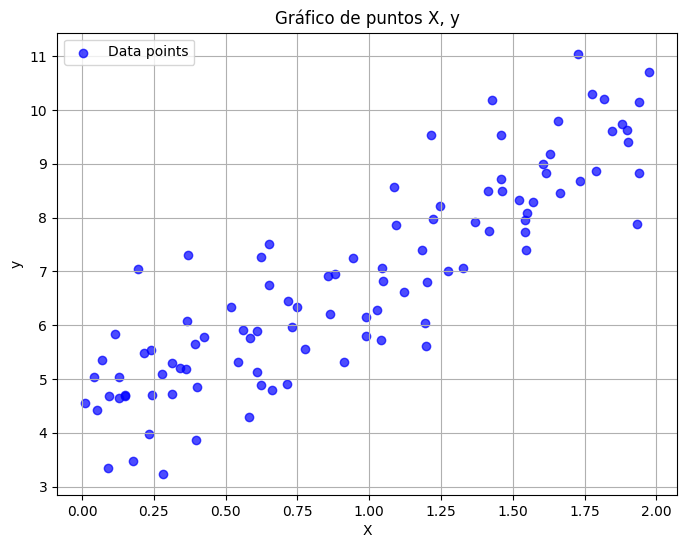

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.7, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gráfico de puntos X, y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # añade una columna de 1s al inicio de X para sesgo
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # calcula coef. optimos
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Descenso de gradiente por lotes

Descenso de gradiente: theta0=4.2151, theta1=2.7701
Regresión lineal sklearn: intercepto=4.2151, coeficiente=2.7701


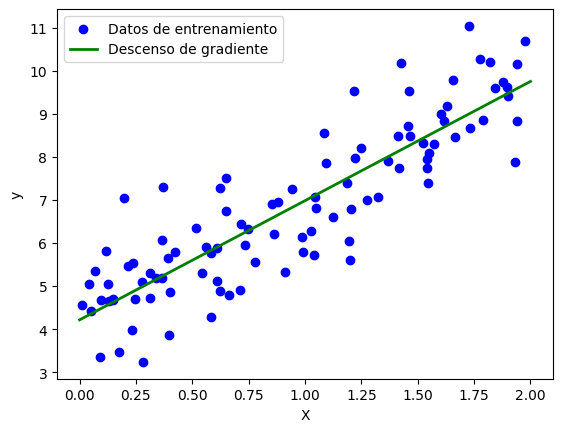

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generamos datos simulados
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 muestras, 1 característica
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + ruido

# Añadimos el término de sesgo (bias) en X
X_b = np.c_[np.ones((100, 1)), X]  # Agregamos columna de 1s para el término de bias

# Parámetros iniciales
theta = np.random.randn(2, 1)  # Inicializamos parámetros aleatorios
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)  # Número de muestras

# Descenso de gradiente por lotes
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)  # Calculamos el gradiente
    theta -= learning_rate * gradients  # Actualizamos los parámetros

# Mostramos los parámetros finales
print(f"Descenso de gradiente: theta0={theta[0][0]:.4f}, theta1={theta[1][0]:.4f}")

# Predicciones con el modelo entrenado por descenso de gradiente
X_new = np.array([[0], [2]])  # Puntos extremos para graficar la recta
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Agregamos el término de sesgo
y_predict_gradient = X_new_b.dot(theta)  # Predicción

# ---------- Modelo de regresión lineal con scikit-learn ----------
model = LinearRegression()
model.fit(X, y)  # Entrenamos el modelo con los datos
y_predict_sklearn = model.predict(X_new)  # Predicción con scikit-learn

# Mostramos los parámetros del modelo de scikit-learn
print(f"Regresión lineal sklearn: intercepto={model.intercept_[0]:.4f}, coeficiente={model.coef_[0][0]:.4f}")

# ---------- Representación gráfica ----------
plt.scatter(X, y, color="blue", label="Datos de entrenamiento")  # Datos reales
plt.plot(X_new, y_predict_gradient, "g-", linewidth=2, label="Descenso de gradiente")  # Línea en verde
#plt.plot(X_new, y_predict_sklearn, "r--", linewidth=2, label="Regresión Lineal (sklearn)")  # Línea en rojo discontinua
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()